# Mean Reversion Trading Algorithm
* Trading strategy that focuses on when a security moves "too" far away from some kind of average
* General idea is that it will move back toward the mean - at some point
* Many ways to look at this strategy, i.e. linear regression, moving average
* How far is too far? 

In [15]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [18]:
gld = pd.DataFrame(pdr.get_data_yahoo('GLD')['Close'])

In [19]:
gld.head()

,Close
Date,
2016-05-13,121.709999
2016-05-16,121.800003
2016-05-17,122.220001
2016-05-18,120.099998
2016-05-19,119.870003


In [49]:
ma = 21
gld['returns'] = np.log(gld["Close"]).diff()
gld['ma'] = gld['Close'].rolling(ma).mean()
gld['ratio'] = gld['Close'] / gld['ma']

In [50]:
gld['ratio'].describe()

count    1195.000000
mean        1.002400
std         0.020779
min         0.915509
25%         0.989778
50%         1.001400
75%         1.015691
max         1.087576
Name: ratio, dtype: float64

In [51]:
percentiles = [5, 10, 50, 90, 95]
p = np.percentile(gld['ratio'].dropna(), percentiles)

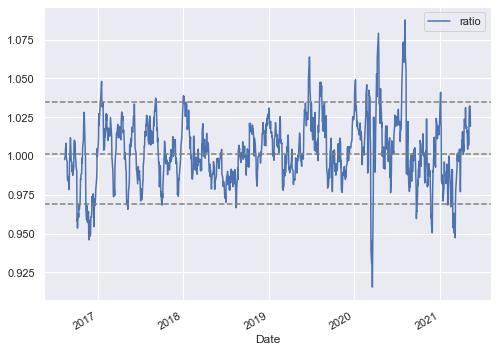

In [52]:
gld['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

In [53]:
short = p[-1]
long = p[0]
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = gld['position'].ffill()

<AxesSubplot:xlabel='Date'>

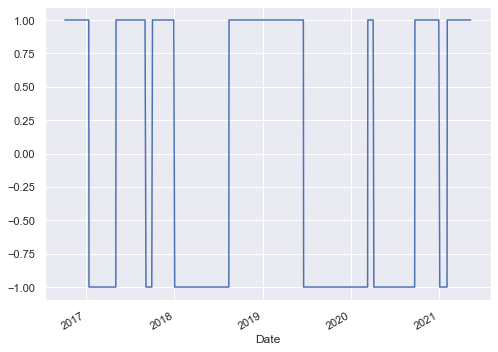

In [54]:
gld.position.dropna().plot()

In [56]:
gld['strat_return'] = gld['returns'] * gld['position'].shift()

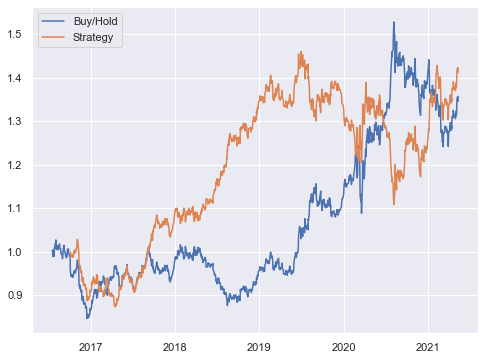

In [58]:
plt.plot(np.exp(gld['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

In [59]:
print(np.exp(gld['returns'].dropna()).cumprod()[-1] -1)
print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] - 1)

0.34627166564051426
0.4125043685393106
